In [1]:
import lhapdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
pdfs = lhapdf.mkPDFs("NNPDF31_lo_as_0118")

In [3]:
pdfs[0].xfxQ2(0.1, 92)

{-5: 0.006196127432048584,
 -4: 0.026074600194782884,
 -3: 0.0183059961400109,
 -2: 0.12880316154517965,
 -1: 0.17598217514798423,
 1: 0.3944907578532454,
 2: 0.579051055516575,
 3: 0.02911658869360837,
 4: 0.0260746010856186,
 5: 0.006196126417700744,
 21: 1.1529435570194748}

Build the dataframe

In [4]:
pids = {-5: "bbar", -4: "cbar", -3: "sbar", -2: "ubar", -1: "dbar", 1: "d", 2: "u", 3: "s", 4: "c", 5: "b", 21: "gluon"}
xs = np.geomspace(1e-2, 1, 30)
local_dfs = []

for i, replica in enumerate(pdfs):
    outs = np.vectorize(lambda x, Q2: [x, replica.xfxQ2(x,Q2)], excluded=[1])(xs, 92)
    
    rows = []
    for el in outs:
        x = el[0]
        rows += [[x, y, pids[pid]] for pid, y in el[1].items()]
        
    local_df = pd.DataFrame(rows)
    local_df.columns = ["x", "f", "pid"]
    local_df["replica"] = i
    local_dfs += [local_df]
    
df = pd.concat(local_dfs)
df.reset_index(drop=True, inplace=True)
#df.sort_values("pid")
df

,x,f,pid,replica
0,0.01,5.702547e-02,bbar,0
1,0.01,1.560412e-01,cbar,0
2,0.01,4.462806e-02,sbar,0
3,0.01,5.036755e-01,ubar,0
4,0.01,5.218085e-01,dbar,0
...,...,...,...,...
33325,1.00,1.000000e-10,u,100
33326,1.00,1.000000e-10,s,100
33327,1.00,1.000000e-10,c,100
33328,1.00,1.000000e-10,b,100


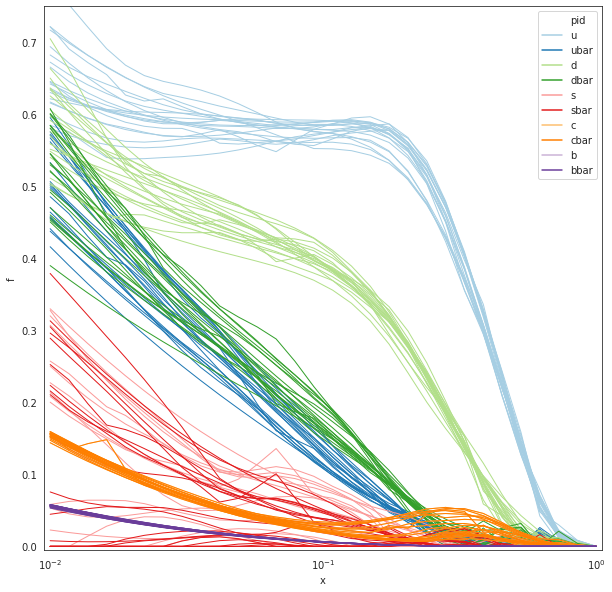

In [13]:
def myplot(df=df):
#     df = df[df.index < 20000]
    plt.figure(figsize=(10,10))
    plt.xscale('log')
    plt.yscale('linear')
    plt.xlim(min(xs)*0.95, max(xs)*1.05)
    plt.ylim(-0.005, 0.75)
    sns.lineplot(x="x",
                 y="f",
                 hue="pid",
                 hue_order=['u', 'ubar', 'd', 'dbar', 's', 'sbar', 'c', 'cbar', 'b', 'bbar'],#, 'gluon'],
                 units="replica",
                 estimator=None,
                 lw=1,
                 data=df[(df["replica"] < 20) & (df["pid"] != "gluon")],
                 palette="Paired")
#     sns.lineplot(x="x",
#                  y="f",
#                  hue="pid",
#                  hue_order=['u', 'ubar', 'd', 'dbar', 's', 'sbar', 'c', 'cbar', 'b', 'bbar', 'gluon'],
#                  ci=99.7,
#                  estimator=None,
#                  data=df[df["pid"] != "gluon"],
#                  palette="Paired",
#                  legend=False)
    plt.savefig("NNPDF31_lo_as_0118_wo_gluon.pdf")
    
myplot()

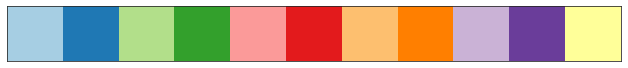

In [6]:
sns.palplot(sns.color_palette("Paired", 11))